<a href="https://colab.research.google.com/github/DuplamenteH/Ds/blob/master/Aula1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando as Notas em geral

In [1]:
import pandas as pd
data = pd.read_csv('ratings.csv')
data.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [2]:
data['rating'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [3]:
data['rating'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

In [4]:
data['rating'].mean()
 

3.501556983616962

In [5]:
data['rating'].median()  

3.5

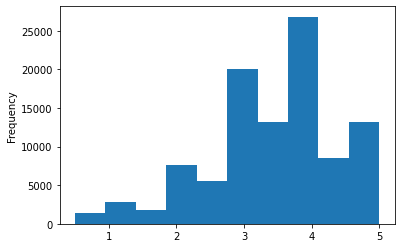

In [6]:
data.rating.plot(kind='hist')

In [7]:
data.rating.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

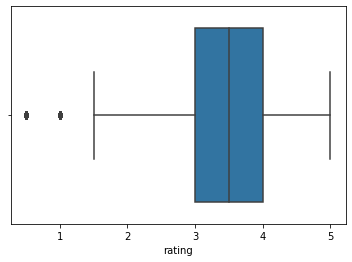

In [8]:
import seaborn as sns

sns.boxplot(data.rating)

In [0]:
data.columns = ["usuarioId", "filmeId", "nota", "momento"]

In [10]:
data.head(10)

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


# Carregando os Filmes

In [11]:
filmes = pd.read_csv('movies.csv')
filmes.columns=["idfilme","titulo","genero"]
filmes.head(5)

,idfilme,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Analisando as notas dos Filmes específicos 


In [0]:
dataToyStory=data.query("filmeId==1")

In [13]:
dataToyStory.nota.mean()

3.9209302325581397

In [14]:
medias_por_filme=data.groupby("filmeId").mean()["nota"]
medias_por_filme.head(5)

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

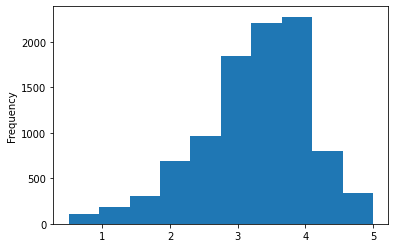

In [15]:
medias_por_filme.plot(kind='hist')

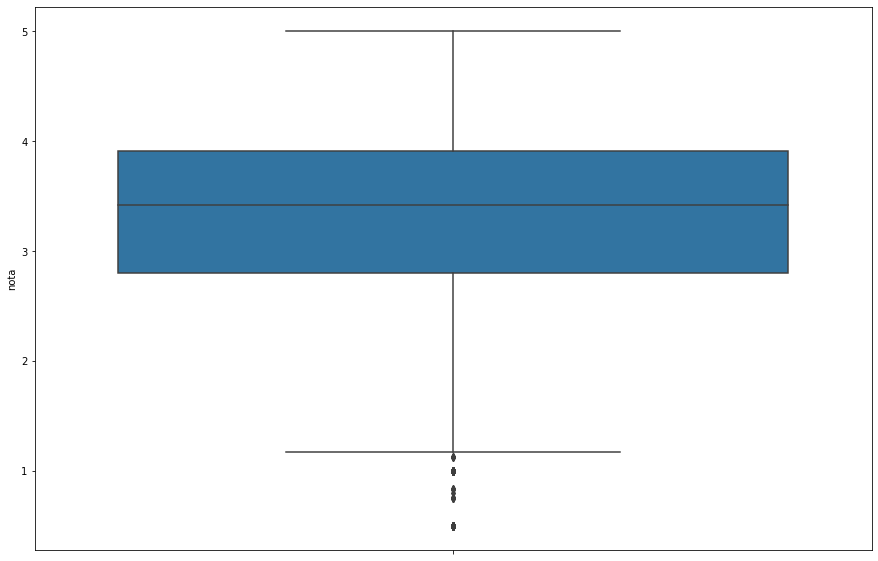

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sns.boxplot(y=medias_por_filme)


In [17]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

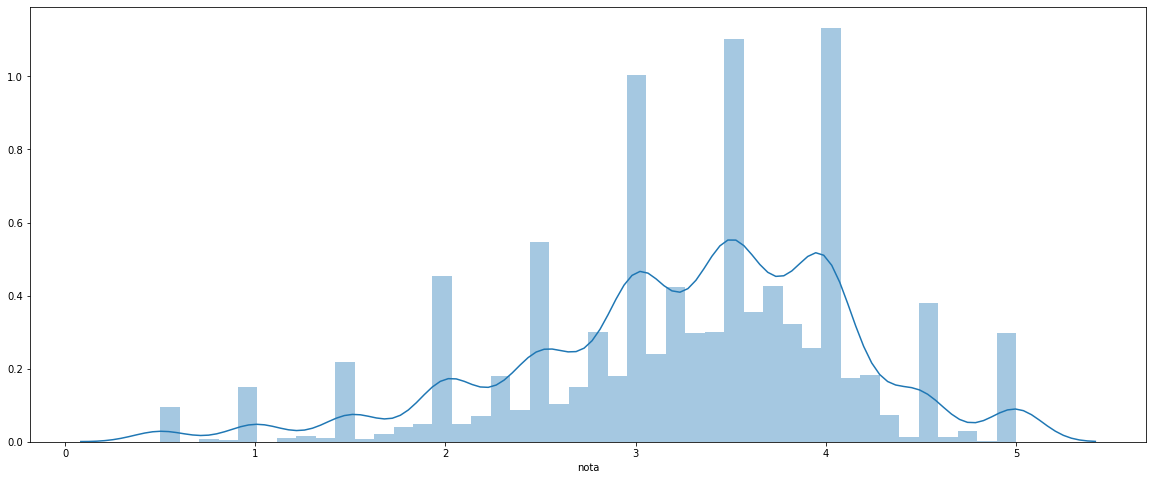

In [18]:
plt.figure(figsize=(20,8))
sns.distplot(medias_por_filme)

In [19]:
data_tmdb = pd.read_csv("tmdb_5000_movies.csv")
data_tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [20]:
data_tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [21]:
data_tmdb.vote_average.unique()

array([ 7.2,  6.9,  6.3,  7.6,  6.1,  5.9,  7.4,  7.3,  5.7,  5.4,  7. ,
        6.5,  6.4,  6.2,  7.1,  5.8,  6.6,  7.5,  5.5,  6.7,  6.8,  6. ,
        5.1,  7.8,  5.6,  5.2,  8.2,  7.7,  5.3,  8. ,  4.8,  4.9,  7.9,
        8.1,  4.7,  5. ,  4.2,  4.4,  4.1,  3.7,  3.6,  3. ,  3.9,  4.3,
        4.5,  3.4,  4.6,  8.3,  3.5,  4. ,  2.3,  3.2,  0. ,  3.8,  2.9,
        8.5,  1.9,  3.1,  3.3,  2.2,  0.5,  9.3,  8.4,  2.7, 10. ,  1. ,
        2. ,  2.8,  9.5,  2.6,  2.4])

In [22]:
data_tmdb.original_language.value_counts().to_frame()

,original_language
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12
ru,11


In [23]:
data_tmdb.original_language.value_counts().to_frame().reset_index()

,index,original_language
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


In [24]:
contagem_de_lingua = data_tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


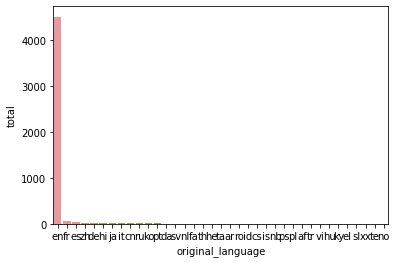

In [25]:
sns.barplot(x="original_language", y="total", data = contagem_de_lingua)

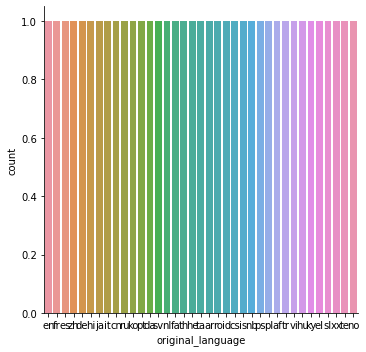

In [35]:
sns.catplot(x="original_language",kind="count",data=contagem_de_lingua)

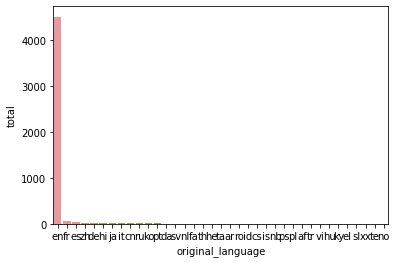

In [27]:
sns.barplot(x="original_language", y="total", data = contagem_de_lingua)

([<matplotlib.patches.Wedge at 0x7f2ba2b90588>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

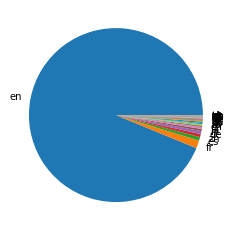

In [28]:
plt.pie(contagem_de_lingua["total"], labels = contagem_de_lingua["original_language"])

In [29]:
total_por_lingua = data_tmdb["original_language"].value_counts()
total_por_lingua.loc["en"]

4505

In [30]:
total_por_lingua = data_tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


In [31]:
dados = {
    'lingua' : ['ingles','outros'],
    'total' : [total_de_ingles, total_do_resto]

}

pd.DataFrame(dados)

,lingua,total
0,ingles,4505
1,outros,298


In [32]:
dados = {
    'lingua' : ['ingles','outros'],
    'total' : [total_de_ingles, total_do_resto]

}

dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


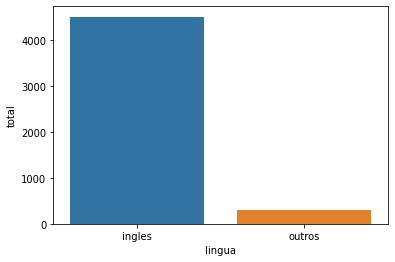

In [33]:
sns.barplot(data = dados, x = 'lingua', y = 'total')

([<matplotlib.patches.Wedge at 0x7f2ba55eeba8>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

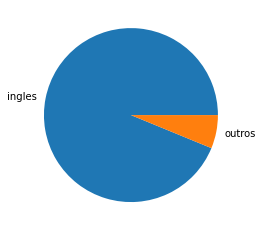

In [34]:
plt.pie(dados["total"], labels = dados["lingua"])

In [44]:
total_de_linguas_de_outros_filmes = data_tmdb.query("original_language != 'en' ").original_language.value_counts()
total_de_linguas_de_outros_filmes

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
nl     4
fa     4
he     3
th     3
ar     2
ta     2
ro     2
id     2
cs     2
pl     1
ps     1
sl     1
tr     1
nb     1
hu     1
is     1
ky     1
te     1
vi     1
xx     1
no     1
af     1
el     1
Name: original_language, dtype: int64

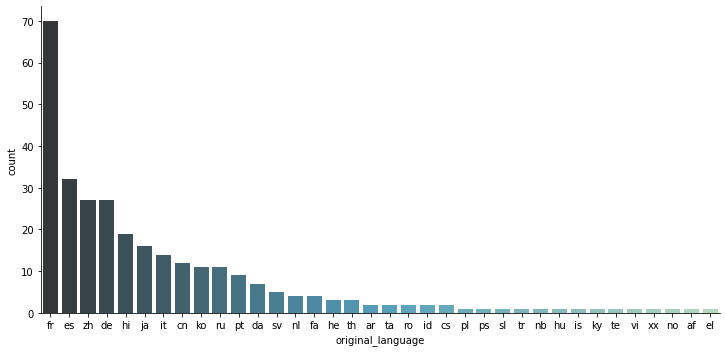

In [49]:
filmes_sem_lingua_original_inglesa = data_tmdb.query("original_language != 'en' ")

sns.catplot(x="original_language", kind="count",data=filmes_sem_lingua_original_inglesa,
            aspect=2,
            palette="GnBu_d",
            order=total_de_linguas_de_outros_filmes.index)


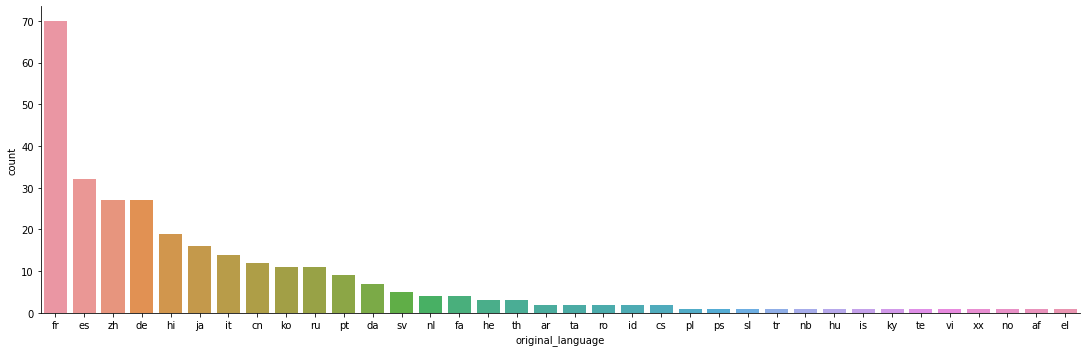

In [48]:
sns.catplot(x="original_language", kind="count",data=filmes_sem_lingua_original_inglesa,
            aspect=3,
            order=total_de_linguas_de_outros_filmes.index)

In [51]:
filmes.head(2)

,idfilme,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [54]:
data.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [56]:
notas_toyStory = data.query("filmeId == 1")
notas_Jumanji = data.query("filmeId == 2")
print(len(notas_toyStory),len(notas_Jumanji))

215 110


In [57]:
print("Nota média do Toy Story %.2f" % notas_toyStory.nota.mean())
print("Nota média do Jumanji %.2f" % notas_Jumanji.nota.mean())

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43


In [58]:
print("Nota média do Toy Story %.2f" % notas_toyStory.nota.median())
print("Nota média do Jumanji %.2f" % notas_Jumanji.nota.median())

Nota média do Toy Story 4.00
Nota média do Jumanji 3.50


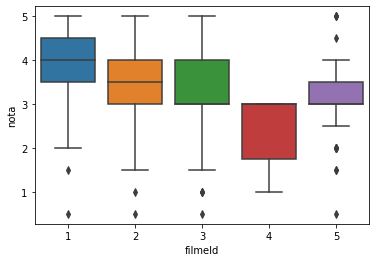

In [59]:
sns.boxplot(x = "filmeId", y = "nota", data = data.query("filmeId in (1,2,3,4,5)"))

In [60]:
print("Desvio padrão do Jumanji %.2f" % notas_Jumanji.nota.std(), "Desvio padrão do Toy Story %.2f" % notas_toyStory.nota.std())

Desvio padrão do Jumanji 0.88 Desvio padrão do Toy Story 0.83


In [0]:
import matplotlib.pyplot as plt 
import numpy as np 

In [0]:
filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))

In [63]:
print(filme1.mean(), filme2.mean())
print(np.std(filme1), np.std(filme2))
print(np.median(filme1), np.median(filme2))

3.0 3.0
0.5 2.0
3.0 3.0


{'boxes': [<matplotlib.lines.Line2D at 0x7f2b9ffb74e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2b9fe54b00>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2b9fe605c0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2b9fe60240>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2b9fe54400>,
  <matplotlib.lines.Line2D at 0x7f2b9fdeb080>]}

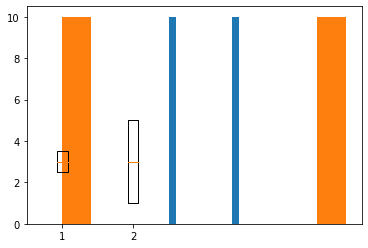

In [64]:
plt.hist(filme1)
plt.hist(filme2)

plt.boxplot([filme1, filme2])

{'boxes': [<matplotlib.lines.Line2D at 0x7f2b9fd149b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2b9fd233c8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2b9fd23e48>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2b9fd23ac8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2b9fd14c88>,
  <matplotlib.lines.Line2D at 0x7f2b9fcb1908>]}

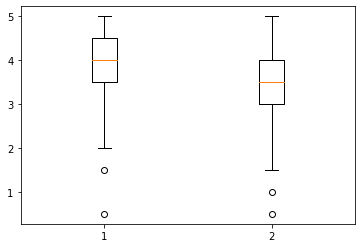

In [67]:
%matplotlib inline
plt.boxplot([notas_toyStory.nota, notas_Jumanji.nota])
